In [140]:
## Import packages
import pandas as pd
import sklearn as skislopes
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [141]:

df = pd.read_csv(r"no_early_dates_90_days.csv")

In [142]:
#First 80-20 Train Test Split, before the EDA

df_train, df_test = train_test_split(df, shuffle = True, test_size = .2, random_state = 420)
df_tt, df_ho = train_test_split(df_train, shuffle = True, test_size = .2, random_state = 420)

<Axes: >

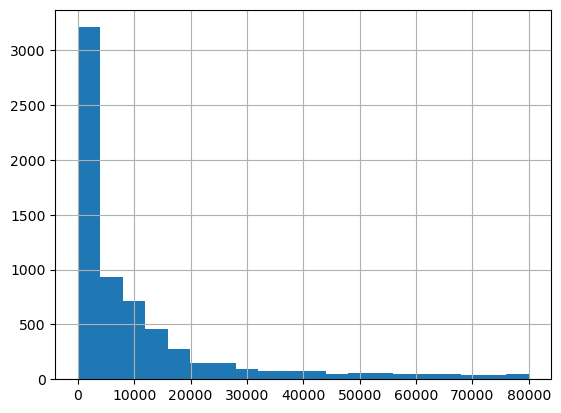

In [143]:
#10k views seems to be a reasonable cut off point for a decent amount of views, it's a little over the median
df_train.query("viewCount < 8e4")["viewCount"].hist(bins=20)

# Selecting Features

In [144]:
def add_features(df):
    df["len_channel_description"] = df["channelDescription"].str.len()
    df["len_channel_username"] = df["channelUsername"].str.len()
    df["len_title"] = df["title"].str.len()

    df["has_over_10k_views"] = df.eval("viewCount >= 10000").astype(int)
    return df

In [145]:
df_tt_with_features = add_features(df_tt)
df_ho_with_features = add_features(df_ho)

In [146]:
features = ["month", "day_of_week", "hour", "len_title","duration_in_seconds",
            "hashtags", "popular_brand", "self_ref", "korean", "prime_hour"]

responder = "has_over_10k_views"

In [147]:
X_train = df_tt_with_features[features].values
y_train = df_tt_with_features[responder].values

In [148]:
tree_clf = DecisionTreeClassifier(max_depth=10)

## fit the classifier
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [149]:
y_tt_preds = tree_clf.predict(df_tt_with_features[features])
y_ho_preds = tree_clf.predict(df_ho_with_features[features])

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


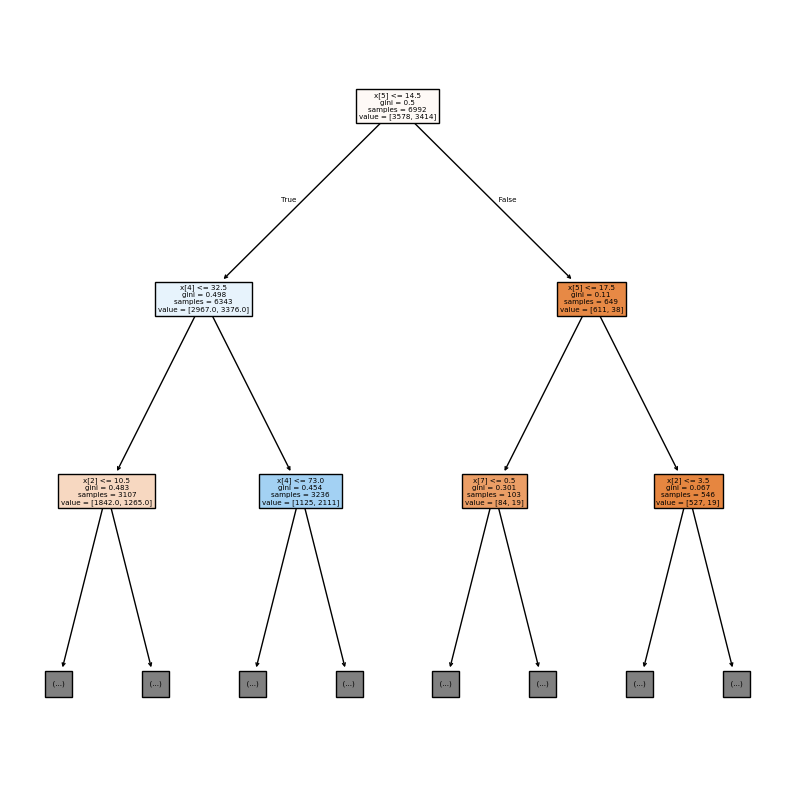

In [150]:
## Plot the fitted tree
plt.figure(figsize = (10,10))
tree.plot_tree(tree_clf, filled = True, max_depth=2)
plt.show()

In [151]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true=df_tt_with_features[responder], y_pred=y_tt_preds))
print(accuracy_score(y_true=df_ho_with_features[responder], y_pred=y_ho_preds))

0.7678775743707094
0.6683819325328759


In [152]:
df_tt_with_features["model_predictions"] = y_tt_preds

<Axes: >

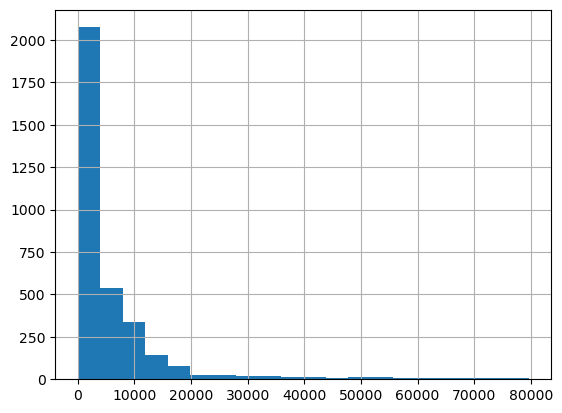

In [153]:
df_tt_with_features.query("viewCount < 8e4 and model_predictions < 0.5")["viewCount"].hist(bins=20)

<Axes: >

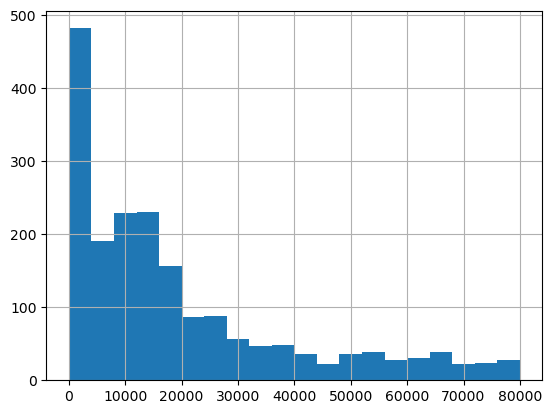

In [154]:
df_tt_with_features.query("viewCount < 8e4 and model_predictions > 0.5")["viewCount"].hist(bins=20)

In [155]:
forest = RandomForestRegressor(
    n_estimators=500,
    max_depth=25,
    min_samples_leaf=3,
)

forest_responder = "viewCount"
y_tt_forest = df_tt_with_features[forest_responder].values


In [156]:
## Fit the model
forest.fit(X_train, y_tt_forest)

RandomForestRegressor(max_depth=25, min_samples_leaf=3, n_estimators=500)

In [157]:
rf_tt_preds = forest.predict(X_train)
rf_ho_preds = forest.predict(df_ho_with_features[features])
df_tt_with_features["rf_preds"] = rf_tt_preds
df_ho_with_features["rf_preds"] = rf_ho_preds

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [158]:
from sklearn.metrics import r2_score

In [159]:
r2_score(y_true=df_tt_with_features["viewCount"], y_pred=df_tt_with_features["rf_preds"])

0.4634057442616466

In [160]:
r2_score(y_true=df_ho_with_features["viewCount"], y_pred=df_ho_with_features["rf_preds"])

0.11099118496902294

<Axes: xlabel='rf_preds', ylabel='viewCount'>

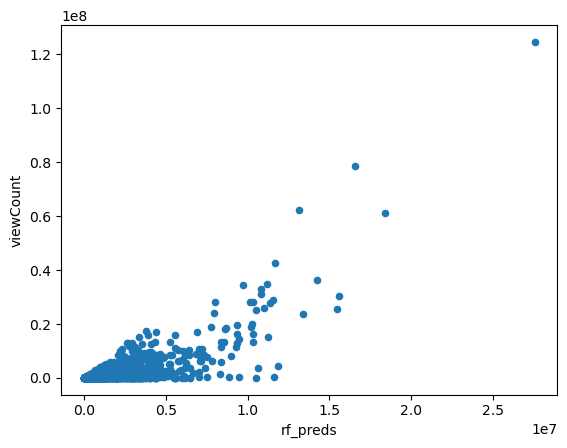

In [161]:
df_tt_with_features.plot.scatter("rf_preds", "viewCount")

<Axes: xlabel='rf_preds', ylabel='viewCount'>

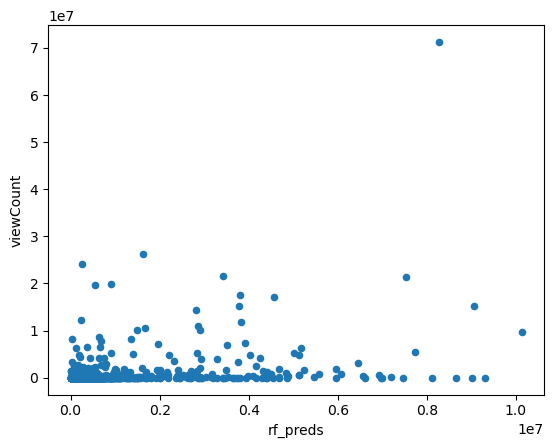

In [162]:
df_ho_with_features.plot.scatter("rf_preds", "viewCount")